In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 100

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

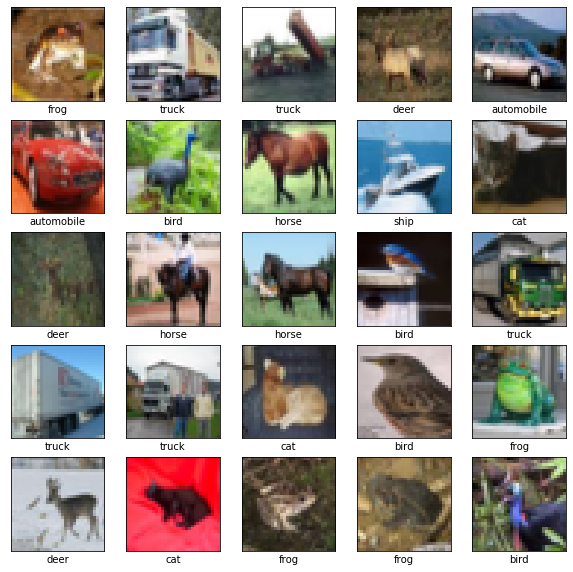

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
#build network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

In [14]:
train_label = keras.utils.to_categorical(y_train, num_classes)
test_label = keras.utils.to_categorical(y_test, num_classes)

In [15]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.4237 - acc: 0.4848
Epoch 2/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.0644 - acc: 0.6228
Epoch 3/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.9224 - acc: 0.6749
Epoch 4/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.8261 - acc: 0.7093
Epoch 5/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.7426 - acc: 0.7376
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.6658 - acc: 0.7638
Epoch 7/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.5994 - acc: 0.7876
Epoch 8/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.5471 - acc: 0.8067
Epoch 9/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.4974 - acc: 0.8237
Epoch 10/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 

In [16]:
predictions = model.predict(x_test)

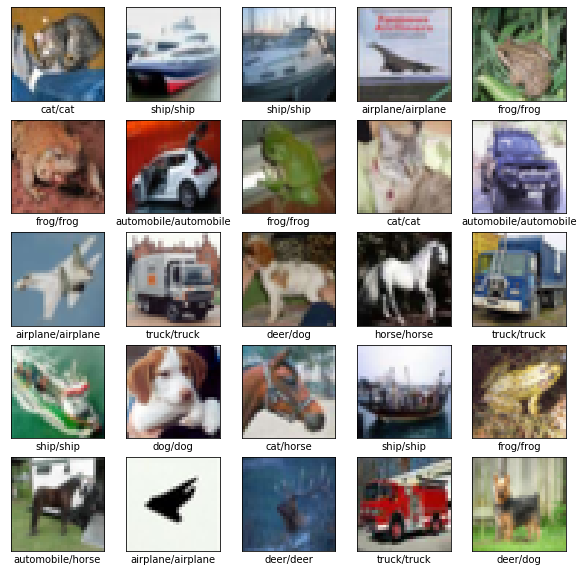

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])] + '/' + class_names[y_test[i][0]])
plt.show()

In [18]:
'''
try deeper network network
'''
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [21]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.7072 - acc: 0.3585
Epoch 2/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.2576 - acc: 0.5500
Epoch 3/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0835 - acc: 0.6186
Epoch 4/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.9821 - acc: 0.6582
Epoch 5/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.9022 - acc: 0.6852
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8559 - acc: 0.7031
Epoch 7/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.8209 - acc: 0.7147
Epoch 8/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.7961 - acc: 0.7239
Epoch 9/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.7773 - acc: 0.7329
Epoch 10/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 

In [22]:
'''
try batch normalization
'''
#build network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)       

In [25]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.3789 - acc: 0.5211
Epoch 2/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.0050 - acc: 0.6438
Epoch 3/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 0.8763 - acc: 0.6911
Epoch 4/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.7910 - acc: 0.7235
Epoch 5/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.7013 - acc: 0.7556
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.6368 - acc: 0.7766
Epoch 7/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.5644 - acc: 0.8002
Epoch 8/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.5146 - acc: 0.8181
Epoch 9/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.4621 - acc: 0.8381
Epoch 10/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 

In [26]:
'''
don't use dropout
'''
#build network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [29]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.2794 - acc: 0.5428
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.8646 - acc: 0.6967
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.6283 - acc: 0.7814
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.4054 - acc: 0.8586
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.2196 - acc: 0.9264
Epoch 6/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.1314 - acc: 0.9552
Epoch 7/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.0931 - acc: 0.9679
Epoch 8/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.0780 - acc: 0.9747
Epoch 9/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.0659 - acc: 0.9783
Epoch 10/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 

In [30]:
'''
try different activation function
'''
#build network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)             

In [33]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 2.0645 - acc: 0.2562
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.7440 - acc: 0.3742
Epoch 3/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.6369 - acc: 0.4143
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5732 - acc: 0.4356
Epoch 5/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5147 - acc: 0.4563
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.4635 - acc: 0.4757
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.4216 - acc: 0.4905
Epoch 8/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.3752 - acc: 0.5033
Epoch 9/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.3437 - acc: 0.5171
Epoch 10/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 

In [34]:
#build network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [35]:
'''
try different learning method and learning rate
'''
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7200)             

In [37]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 285.2359 - acc: 0.0991
Epoch 2/10
50000/50000 [==============================] - 82s 2ms/sample - loss: 2.3156 - acc: 0.1015
Epoch 3/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 2.3168 - acc: 0.0978
Epoch 4/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 2.3166 - acc: 0.0989
Epoch 5/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 2.3159 - acc: 0.0984
Epoch 6/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 2.3163 - acc: 0.0990
Epoch 7/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 2.3163 - acc: 0.0999
Epoch 8/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 2.3165 - acc: 0.0992
Epoch 9/10
50000/50000 [==============================] - 82s 2ms/sample - loss: 2.3164 - acc: 0.1014
Epoch 10/10
50000/50000 [==============================] - 80s 2ms/sample - loss

In [42]:
'''
Depthwise convolution
'''
from tensorflow.keras.layers import SeparableConv2D

#build network
model = Sequential()
model.add(SeparableConv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(SeparableConv2D(11, (3, 3),data_format='channels_first'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 32, 32, 32)        155       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 11, 30, 30)        651       
_________________________________________________________________
activation_32 (Activation)   (None, 11, 30, 30)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 15, 30)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 15, 30)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2250)            

In [44]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.7827 - acc: 0.3539
Epoch 2/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.5154 - acc: 0.4569
Epoch 3/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.4038 - acc: 0.4973
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.3400 - acc: 0.5224
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.2872 - acc: 0.5434
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.2423 - acc: 0.5613
Epoch 7/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.2005 - acc: 0.5720
Epoch 8/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1654 - acc: 0.5896
Epoch 9/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1356 - acc: 0.5987
Epoch 10/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 

In [45]:
'''
Residual Framework
'''

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import os

In [46]:
# Training parameters for residual
data_augmentation = True

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

In [47]:
# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------
n = 3
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2
    
# Input image dimensions.   
input_shape = x_train.shape[1:]

In [48]:
# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

In [49]:
# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [50]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [51]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8,data_format='channels_first')(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [52]:
model = resnet_v1(input_shape=input_shape, depth=depth)

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 32, 32, 16)   64          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_35 (Activation)      (None, 32, 32, 16)   0           batch_normalization_3[0][0]      
______________________________________________________________________________________________

In [54]:
model.fit(x_train, train_label, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 201s 4ms/sample - loss: 1.5603 - acc: 0.4935
Epoch 2/10
50000/50000 [==============================] - 188s 4ms/sample - loss: 1.1471 - acc: 0.6472
Epoch 3/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.9916 - acc: 0.7077
Epoch 4/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.8816 - acc: 0.7465
Epoch 5/10
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.8024 - acc: 0.7794
Epoch 6/10
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.7411 - acc: 0.8047
Epoch 7/10
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.6929 - acc: 0.8226
Epoch 8/10
50000/50000 [==============================] - 182s 4ms/sample - loss: 0.6549 - acc: 0.8357
Epoch 9/10
50000/50000 [==============================] - 183s 4ms/sample - loss: 0.6153 - acc: 0.8530
Epoch 10/10
50000/50000 [==============================] - 183s 4ms/sampl